In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import dill as pickle
from scipy.stats import randint, uniform

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn import metrics
from sklearn.pipeline import make_pipeline

from xgboost import XGBClassifier
from sklearn_pandas import DataFrameMapper

In [65]:
df = pd.read_csv("../data/PS_20174392719_1491204439457_log.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [71]:
def reshape(x):
    return x.reshape(-1, 1)

ct = DataFrameMapper([
    ('type', [FunctionTransformer(reshape), LabelBinarizer()]),
    #('nameOrig', [FunctionTransformer(reshape), LabelBinarizer(sparse_output=True)]),
    #('nameDest', [FunctionTransformer(reshape), LabelBinarizer(sparse_output=True)]),
    ('amount', [FunctionTransformer(reshape), StandardScaler()]),
    ('oldbalanceOrg', [FunctionTransformer(reshape), StandardScaler()]),
    ('newbalanceOrig', [FunctionTransformer(reshape), StandardScaler()]),
    ('oldbalanceDest', [FunctionTransformer(reshape), StandardScaler()]),
    ('newbalanceDest', [FunctionTransformer(reshape), StandardScaler()]),
], sparse=True)
clf = XGBClassifier()

In [72]:
features = ['type', 'nameOrig', 'nameDest', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df, df["isFraud"], stratify=df["step"], test_size=0.33, random_state=42)

In [74]:
X_train

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6135182,544,CASH_OUT,106896.01,C942376328,804.00,0.00,C207349906,0.00,106896.01,0,0
1632443,157,TRANSFER,208612.94,C451955439,0.00,0.00,C332386470,375919.18,584532.13,0,0
986129,45,CASH_IN,60508.16,C1423546695,21567.00,82075.16,C676618342,0.00,0.00,0,0
2006276,179,CASH_OUT,385359.16,C1864792251,70350.00,0.00,C1836234112,0.00,385359.16,0,0
405268,18,CASH_OUT,270408.97,C1376448665,0.00,0.00,C757993936,1331950.58,1602359.55,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5327330,374,PAYMENT,43158.29,C606950887,437048.00,393889.71,M955339450,0.00,0.00,0,0
3546465,260,CASH_IN,133135.26,C1743383216,2239424.02,2372559.28,C1293641049,777493.92,644358.66,0,0
4935537,350,CASH_OUT,153986.43,C130419115,0.00,0.00,C506971794,155720.87,309707.30,0,0
6214223,588,PAYMENT,19218.37,C1267416822,0.00,0.00,M551720488,0.00,0.00,0,0


In [76]:
X = X_train
y = X["isFraud"]
X = ct.fit_transform(X)

In [77]:
k = pd.DataFrame([df.iloc[1]])
ct.transform(k[features])

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        -0.29387288, -0.28151348, -0.28596091, -0.32605594, -0.33559792]])

In [78]:
parameters = {
    'max_depth': randint(2, 10),
    'n_estimators': randint(60, 220),
    'learning_rate': uniform(0.01, 0.1)
}

In [ ]:
grid_search = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=parameters,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 3,
    verbose = 2,
    n_iter=5,
)
grid_search.fit(X, y)

In [10]:
grid_search.best_params_

{'learning_rate': 0.10867386642568048, 'max_depth': 9, 'n_estimators': 122}

In [82]:
clf = XGBClassifier(learning_rate=0.10867386642568048, max_depth=9, n_estimators=122).fit(X, y)

[11:44:15] WARNING: /Users/travis/build/dmlc/xgboost/src/gbm/gbtree.cc:139: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [118]:
pipe = make_pipeline(ct, clf)
pickle.dump(pipe, open("../models/xgb_model.pkl", 'wb'))

In [84]:
data = {"type": "PAYMENT", "amount": 9839.64, "nameOrig": "C1231006815", "oldbalanceOrg": 170136.00,
       "newbalanceOrig": 160296.36, "nameDest": "M1979787155", "oldbalanceDest": 0, "newbalanceDest": 0}

In [85]:
d = pd.DataFrame([data])
d[features]

,type,nameOrig,nameDest,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,PAYMENT,C1231006815,M1979787155,9839.64,170136.0,160296.36,0,0


In [122]:
df[df["isFraud"] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [93]:
pipe.predict_proba(d[features])

array([[9.9999875e-01, 1.2388463e-06]], dtype=float32)

In [58]:
OneHotEncoder().fit(df["nameOrig"][:500].values.reshape(-1, 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [98]:
lr = LogisticRegression(solver='saga', max_iter=1000).fit(X, y)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [100]:
y_pred = pipe.predict(X_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00   2096966\n           1       0.98      0.77      0.86      2699\n\n    accuracy                           1.00   2099665\n   macro avg       0.99      0.89      0.93   2099665\nweighted avg       1.00      1.00      1.00   2099665\n'

In [101]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096966
           1       0.98      0.77      0.86      2699

    accuracy                           1.00   2099665
   macro avg       0.99      0.89      0.93   2099665
weighted avg       1.00      1.00      1.00   2099665



In [102]:
pipe2 = make_pipeline(ct, lr)

In [103]:
print(metrics.classification_report(y_test, pipe2.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096966
           1       0.95      0.34      0.50      2699

    accuracy                           1.00   2099665
   macro avg       0.97      0.67      0.75   2099665
weighted avg       1.00      1.00      1.00   2099665



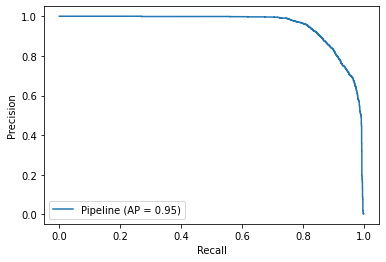

In [108]:
p = metrics.plot_precision_recall_curve(pipe, X_test, y_test)

In [114]:
p.ax_.set_title("Precision Recall Curve for XGBoost")
p.ax_.get_figure().savefig("pr.png")